In [1]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [2]:
X_train = X[:-10000]
X_test = X[-10000:]
y_train = y[:-10000]
y_test = y[-10000:]

In [3]:
from nearest_neighbors import KNNClassifier
from cross_validation import knn_cross_val_score
from cross_validation import kfold
from cross_validation import accuracy
import numpy as np

In [4]:
features = np.arange(X.shape[1])
f_10 = np.random.choice(features, size=10, replace=False)
f_20 = np.random.choice(features, size=20, replace=False)
f_100 = np.random.choice(features, size=100, replace=False)

In [12]:
model = KNNClassifier(k=5, strategy='brute', metric='euclidean', weights=True,
                      test_block_size=100)

In [13]:
%%time
model.fit(X_train[:, f_10], y_train)
y_pred = model.predict(X_test[:, f_10])
accuracy(y_pred, y_test)

Wall time: 39.2 s


0.2871

In [14]:
%%time
model.fit(X_train[:, f_20], y_train)
y_pred = model.predict(X_test[:, f_20])
accuracy(y_pred, y_test)

Wall time: 55.5 s


0.4944

In [15]:
%%time
model.fit(X_train[:, f_100], y_train)
y_pred = model.predict(X_test[:, f_100])
accuracy(y_pred, y_test)

Wall time: 1min 16s


0.9169

In [16]:
model = KNNClassifier(k=5, strategy='kd_tree', metric='euclidean', weights=True,
                      test_block_size=100)

In [20]:
%%time
model.fit(X_train[:, f_10], y_train)
y_pred = model.predict(X_test[:, f_10])
accuracy(y_pred, y_test)

Wall time: 40.6 s


0.2996

In [21]:
%%time
model.fit(X_train[:, f_20], y_train)
y_pred = model.predict(X_test[:, f_20])
accuracy(y_pred, y_test)

Wall time: 45.3 s


0.4985

In [22]:
%%time
model.fit(X_train[:, f_100], y_train)
y_pred = model.predict(X_test[:, f_100])
accuracy(y_pred, y_test)

Wall time: 5min 51s


0.9169

In [29]:
model = KNNClassifier(k=5, strategy='ball_tree', metric='euclidean', weights=True,
                      test_block_size=100)

In [30]:
%%time
model.fit(X_train[:, f_10], y_train)
y_pred = model.predict(X_test[:, f_10])
accuracy(y_pred, y_test)

Wall time: 1min 6s


0.343

In [31]:
%%time
model.fit(X_train[:, f_20], y_train)
y_pred = model.predict(X_test[:, f_20])
accuracy(y_pred, y_test)

Wall time: 1min 31s


0.4047

In [32]:
%%time
model.fit(X_train[:, f_100], y_train)
y_pred = model.predict(X_test[:, f_100])
accuracy(y_pred, y_test)

Wall time: 5min 15s


0.8794

In [33]:
model = KNNClassifier(k=5, strategy='my_own', metric='euclidean', weights=False,
                      test_block_size=100)

In [34]:
%%time
model.fit(X_train[:, f_10], y_train)
y_pred = model.predict(X_test[:, f_10])
accuracy(y_pred, y_test)

Wall time: 2min 24s


0.3397

In [35]:
%%time
model.fit(X_train[:, f_20], y_train)
y_pred = model.predict(X_test[:, f_20])
accuracy(y_pred, y_test)

Wall time: 2min 16s


0.4006

In [36]:
%%time
model.fit(X_train[:, f_100], y_train)
y_pred = model.predict(X_test[:, f_100])
accuracy(y_pred, y_test)

Wall time: 2min 36s


0.8787

In [23]:
from cross_validation import kfold

In [5]:
cv_folds = kfold(X_train.shape[0], 3)

In [25]:
k_list = np.arange(1, 11)
k_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [49]:
cvs = knn_cross_val_score(X_train, y_train, k_list, cv=cv_folds, strategy='brute', metric='euclidean',
                          weights=True, test_block_size=500)

In [62]:
cos_cvs = knn_cross_val_score(X_train, y_train, [4], cv=cv_folds, strategy='brute', metric='cosine',
                          weights=True, test_block_size=500)

KeyboardInterrupt: 

In [50]:
cvs

{1: array([0.96895, 0.96675, 0.9667 ]),
 2: array([0.96895, 0.96675, 0.9667 ]),
 3: array([0.97075, 0.9691 , 0.96825]),
 4: array([0.9713, 0.9698, 0.9701]),
 5: array([0.96925, 0.96825, 0.96875]),
 6: array([0.9704 , 0.96845, 0.96945]),
 7: array([0.96735, 0.96595, 0.967  ]),
 8: array([0.9676 , 0.96665, 0.9678 ]),
 9: array([0.9651, 0.9643, 0.9657]),
 10: array([0.9647 , 0.96465, 0.9657 ])}

Text(0, 0.5, 'accuracy')

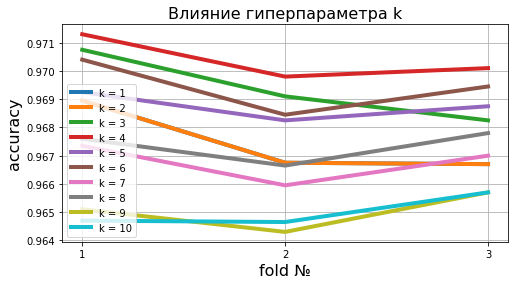

In [63]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig, ax = plt.subplots()
plt.title('Влияние гиперпараметра k', fontsize=16)
for i in range(1, 11):
    ax.plot(np.arange(1, 4), cvs[i], label =  'k = ' + str(i), linewidth=4)
ax.legend()
ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
fig.set_figwidth(8)
fig.set_figheight(4)
plt.xlabel('fold №', fontsize=16)
plt.ylabel('accuracy', fontsize=16)

In [53]:
fig.savefig('exp2.pdf')

In [6]:
%%time
euc_cvs = knn_cross_val_score(X_train, y_train, [4], cv=cv_folds, strategy='brute', metric='euclidean',
                 weights=True, test_block_size=400)

Wall time: 2min 1s


In [7]:
euc_cvs

{4: array([0.9713, 0.9698, 0.9701])}

In [8]:
%%time
cos_cvs = knn_cross_val_score(X_train, y_train, [4], cv=cv_folds, strategy='brute', metric='cosine',
                 weights=True, test_block_size=400)

Wall time: 3min 18s


In [9]:
cos_cvs

{4: array([0.97545, 0.9732 , 0.97365])}

In [66]:
euc = np.array([0.9713, 0.9698, 0.9701])
cos = np.array([0.97545, 0.9732 , 0.97365])

In [73]:
cos.mean()

0.9741

Text(0, 0.5, 'accuracy')

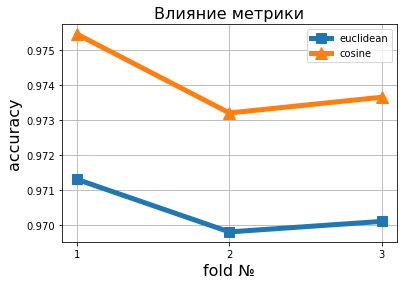

In [68]:
fig, ax = plt.subplots()
plt.title('Влияние метрики', fontsize=16)
ax.plot(np.arange(1, 4), euc, label =  'euclidean', linewidth=5, marker='s', markersize=10)
ax.plot(np.arange(1, 4), cos, label =  'cosine', linewidth=5, marker='^', markersize=12)
ax.legend()
ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
fig.set_figwidth(6)
fig.set_figheight(4)
plt.xlabel('fold №', fontsize=16)
plt.ylabel('accuracy', fontsize=16)

In [69]:
fig.savefig('exp2_2.pdf')

In [10]:
%%time
cvs_nw = knn_cross_val_score(X_train, y_train, [4], cv=cv_folds, strategy='brute', metric='euclidean',
                 weights=False, test_block_size=400)


Wall time: 2min 8s


In [74]:
cvs_nw

NameError: name 'cvs_nw' is not defined

In [12]:
%%time
cvs_w = knn_cross_val_score(X_train, y_train, [4], cv=cv_folds, strategy='brute', metric='euclidean',
                 weights=True, test_block_size=400)

Wall time: 2min 27s


In [75]:
cvs_w

NameError: name 'cvs_w' is not defined

cvs_nw, cvs_w которые получились в результате прошлых 4х комманд указаны в следующей строке

In [70]:
cv_w = np.array([0.9713, 0.9698, 0.9701])
cv_nw = np.array([0.96705, 0.9667 , 0.9671 ])

Text(0, 0.5, 'accuracy')

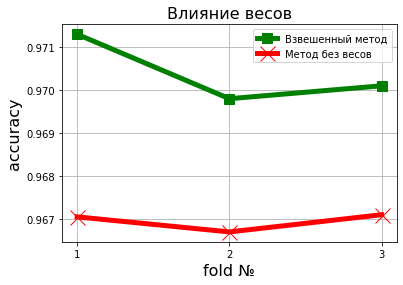

In [71]:
fig, ax = plt.subplots()
plt.title('Влияние весов', fontsize=16)
ax.plot(np.arange(1, 4), cv_w, label =  'Взвешенный метод', linewidth=5, color='green', marker='s', markersize=10)
ax.plot(np.arange(1, 4), cv_nw, label =  'Метод без весов', linewidth=5, color='red', marker='x', markersize=15)
ax.legend()
ax.grid()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
fig.set_figwidth(6)
fig.set_figheight(4)
plt.xlabel('fold №', fontsize=16)
plt.ylabel('accuracy', fontsize=16)

In [72]:
fig.savefig('exp3.pdf')

In [31]:
best_model = KNNClassifier(k=4, strategy='brute', metric='cosine', weights=True,
                      test_block_size=200)

In [32]:
best_model.fit(X_train, y_train)

In [33]:
y_pred = best_model.predict(X_test)

In [34]:
accuracy(y_pred, y_test)

0.9752

In [21]:
accuracy(y_pred2, y_test)

0.9738

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [38]:
c_m = confusion_matrix(y_test, y_pred, normalize='true')

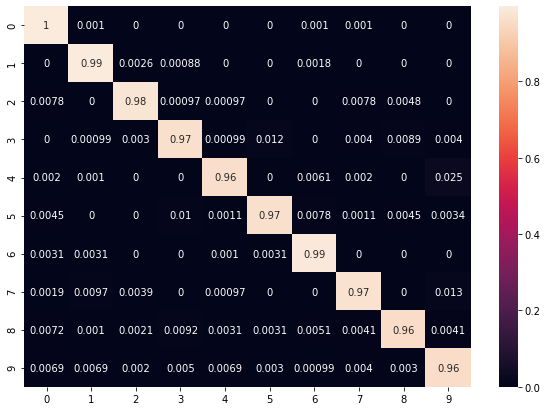

In [39]:
# взято здесь: https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
df_cm = pd.DataFrame(c_m, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
fig = plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [40]:
fig.savefig('exp4_c_m.pdf')

In [41]:
ers_id = np.arange(y_test.size)[y_test != y_pred]

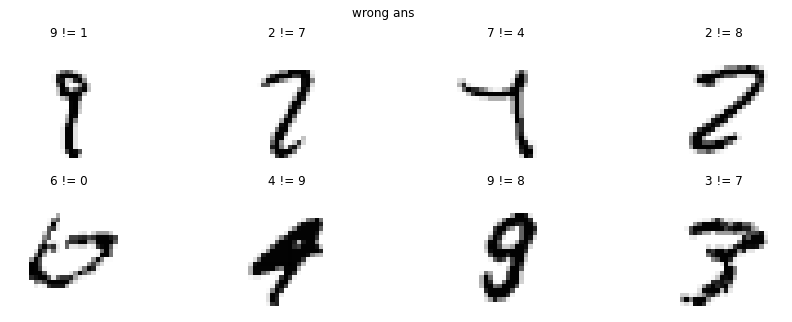

In [60]:
fig, axs = plt.subplots(2, 4)
fig.suptitle('wrong ans', fontsize=12)
fig.set_figwidth(15)
fig.set_figheight(5)

for i in range(3, 11):
    ttl = str(y_test[ers_id[i]]) + " != " + str(y_pred[ers_id[i]])
    axs.flat[i - 3].set_title(ttl)
    axs.flat[i - 3].axis("off")
    axs.flat[i - 3].imshow(X_test[ers_id[i]].reshape((28, 28)), cmap="Greys")

In [61]:
fig.savefig('exp4_wa.pdf')

In [5]:
import skimage.io
from skimage.transform import rotate
import scipy.ndimage as ndimage

In [42]:
def augment_rotate(X, angl):
    new_X = np.zeros((0, X.shape[1]))
    for img in X:
        new_obj = rotate(img.reshape(28,28), angl).reshape(1,784)
        new_X = np.vstack([new_X, new_obj])
    return new_X


def augment_shift(X, d):
    new_X = np.zeros((0, X.shape[1]))
    for img in X:
        new_obj = ndimage.shift(img.reshape(28,28), [d[1], d[0]]).reshape(1,784)
        new_X = np.vstack([new_X, new_obj])
    return new_X


def augment_gauss(X, s):
    new_X = np.zeros((0, X.shape[1]))
    for img in X:
        new_obj = ndimage.filters.gaussian_filter(img.reshape(28,28), sigma=s).reshape(1,784)
        new_X = np.vstack([new_X, new_obj])
    return new_X

In [53]:
def cross_val_score_aug(X, y, aug_type, aug_par_list):
    cv = kfold(X.shape[0], 3)
    model = KNNClassifier(k=4, strategy='brute', metric='euclidean',
                          weights=True, test_block_size=200)
    d = {}
    for aug_par in aug_par_list:
        rez = np.array([])
        for train, test in cv:
            model.cv = None
            model.fit(X[train], y[train])
            kn1 = model.find_kneighbors(X[test], True)
            if aug_type == 'a' :
                x2 = augment_rotate(X[train], aug_par)
                x3 = augment_rotate(X[train], -aug_par)
            elif aug_type == 'b':
                x2 = augment_shift(X[train], [0, aug_par])
                x3 = augment_shift(X[train], [aug_par, 0])
            else:
                x2 = augment_gauss(X[train], aug_par)
            model.fit(x2, y[train])
            kn2 = model.find_kneighbors(X[test], True)
            if aug_type != 'c':
                model.fit(x3, y[train])
                kn3 = model.find_kneighbors(X[test], True)
                kn = np.hstack([kn1[0], kn2[0], kn3[0]])
                el = np.hstack([kn1[1], kn2[1], kn3[1]])
            else:
                kn = np.hstack([kn1[0], kn2[0]])
                el = np.hstack([kn1[1], kn2[1]])
            idx = np.argsort(kn, axis=1)
            new_d = np.zeros((kn.shape[0], 4))
            new_el = np.zeros_like(new_d, dtype = int)
            for i in range(kn.shape[0]):
                new_d[i] = (kn[i][idx[i]])[:4]
                new_el[i] = (el[i][idx[i]])[:4]
            model.cv = new_d, new_el
            y_pred = model.predict(X[test])
            rez = np.append(rez, accuracy(y_pred, y[test]))
        d[aug_par] = rez
    return d

аугментация делается очень-очень долго, поэтому для кросс валидации я взял только часть всей выборки

In [89]:
cross_val_score_aug(X_train[:6000], y_train[:6000], aug_type='a', aug_par_list=[5, 10, 15])

{5: array([0.942, 0.952, 0.95 ]),
 10: array([0.949 , 0.9555, 0.9475]),
 15: array([0.94 , 0.958, 0.951])}

In [90]:
cross_val_score_aug(X_train[:6000], y_train[:6000], aug_type='b', aug_par_list=[1, 2, 3])

{1: array([0.9325, 0.939 , 0.9315]),
 2: array([0.926, 0.934, 0.931]),
 3: array([0.92  , 0.936 , 0.9325])}

In [54]:
cross_val_score_aug(X_train[:6000], y_train[:6000], aug_type='c', aug_par_list=[0.5, 1, 1.5])

{0.5: array([0.929 , 0.9405, 0.939 ]),
 1: array([0.94 , 0.958, 0.948]),
 1.5: array([0.9435, 0.958 , 0.946 ])}

In [20]:
model = KNNClassifier(k=4, strategy='brute', metric='euclidean',
                      weights=True, test_block_size=200)

In [21]:
x1 = X_train[:10000]

In [22]:
x2 = augment_gauss(x1, 1)

In [23]:
model.fit(x1, y_train[:10000])
kn1 = model.find_kneighbors(X_train[-2000:], True)

In [24]:
model.fit(x2, y_train[:10000])
kn2 = model.find_kneighbors(X_train[-2000:], True)

In [25]:
kn = np.hstack([kn1[0], kn2[0]])
idx = np.argsort(kn, axis=1)
el = np.hstack([kn1[1], kn2[1]])

In [26]:
new_d = np.zeros((kn.shape[0], 4))
new_el = np.zeros_like(new_d, dtype = int)
for i in range(kn.shape[0]):
    new_d[i] = (kn[i][idx[i]])[:4]
    new_el[i] = (el[i][idx[i]])[:4]

In [27]:
model.cv = new_d, new_el

In [327]:
new_el

array([[1493, 3325, 4087, 1540],
       [2481, 2481, 2577, 2529],
       [ 837,  837,  679, 2111],
       ...,
       [3188, 3188, 4844, 4704],
       [3053, 4367,  901, 3123],
       [1013, 1013,  601, 3299]])

In [28]:
y_pred = model.predict(x2)

In [30]:
accuracy(y_pred, y_train[-2000:])

0.968

In [7]:
x1 = X_train[:5000]
x21 = X_train[-1000:]
x22 = augment_gauss(x21, 1)

In [8]:
model.fit(x1, y_train[:5000])

In [9]:
kn1 = model.find_kneighbors(x21, True)
kn2 = model.find_kneighbors(x22, True)

In [10]:
kn = np.hstack([kn1[0], kn2[0]])
idx = np.argsort(kn, axis=1)
el = np.hstack([kn1[1], kn2[1]])

In [11]:
new_d = np.zeros((kn.shape[0], 4))
new_el = np.zeros_like(new_d, dtype = int)
for i in range(kn.shape[0]):
    new_d[i] = (kn[i][idx[i]])[:4]
    new_el[i] = (el[i][idx[i]])[:4]

In [12]:
model.cv = new_d, new_el

In [13]:
y_pred = model.predict(x21)

In [14]:
accuracy(y_pred, y_train[-1000:])

0.957

In [15]:
model = KNNClassifier(k=4, strategy='brute', metric='euclidean',
                      weights=True, test_block_size=200)

In [19]:
model.fit(X_train[:10000], y_train[:10000])
y_pred = model.predict(X_train[-2000:])
accuracy(y_pred, y_train[-2000:])

0.972

опять же из-за медленной аугментации для анализа матрицы ошибок я взял только часть обучающей выборки

In [10]:
X_train_new = X_train[:6000]
X_aug_rot10 = augment_rotate(X_train_new, 10)
X_aug_rot_10 = augment_rotate(X_train_new, 10)

In [11]:
X_train_new = np.vstack([X_train_new, X_aug_rot10, X_aug_rot_10])

In [12]:
model = KNNClassifier(k=4, strategy='brute', metric='cosine',
                      weights=True, test_block_size=500)

In [14]:
y_train_new = np.hstack([y_train[:6000], y_train[:6000], y_train[:6000]])

In [15]:
y_train_new.shape

(18000,)

In [16]:
model.fit(X_train_new, y_train_new)

In [17]:
y_pred_aug_rot = model.predict(X_test[:1000])

In [18]:
model.fit(X_train[:6000], y_train[:6000])
y_pred = model.predict(X_test[:1000])

In [28]:
c_m = confusion_matrix(y_test[:1000], y_pred, normalize='true')
c_m_rot = confusion_matrix(y_test[:1000], y_pred_aug_rot, normalize='true')

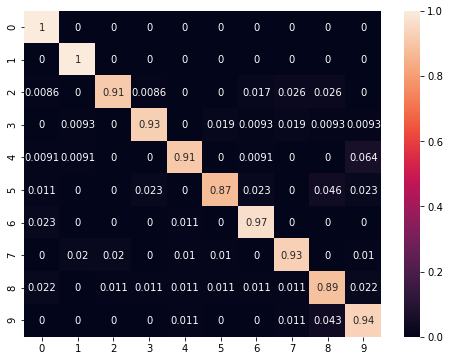

In [38]:
df_cm = pd.DataFrame(c_m, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
fig = plt.figure(figsize = (8,6))
sn.heatmap(df_cm, annot=True)

In [39]:
fig.savefig('exp5_0.pdf')

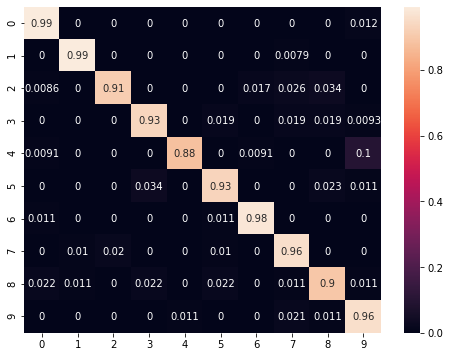

In [40]:
df_cm2 = pd.DataFrame(c_m_rot, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
fig = plt.figure(figsize = (8,6))
sn.heatmap(df_cm2, annot=True)

In [41]:
fig.savefig('exp5_1.pdf')

In [43]:
X_aug_shf1 = augment_shift(X_train[:6000], [1, 0])
X_aug_shf1_1 = augment_shift(X_train[:6000], [0, 1])

In [44]:
X_train_new = np.vstack([X_train[:6000], X_aug_shf1, X_aug_shf1_1])

In [45]:
model.fit(X_train_new, y_train_new)

In [46]:
y_pred_aug_shf = model.predict(X_test[:1000])

In [48]:
c_m_shf = confusion_matrix(y_test[:1000], y_pred_aug_shf, normalize='true')

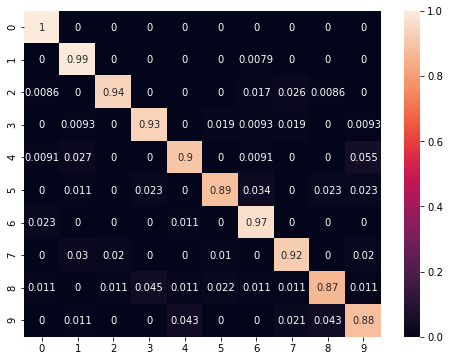

In [49]:
df_cm = pd.DataFrame(c_m_shf, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
fig = plt.figure(figsize = (8,6))
sn.heatmap(df_cm, annot=True)

In [50]:
fig.savefig('exp5_2.pdf')

In [55]:
X_aug_gaus = augment_gauss(X_train[:6000], 1)
X_train_new = np.vstack([X_train[:6000], X_aug_gaus])
y_train_new = np.hstack([y_train[:6000], y_train[:6000]])
model.fit(X_train_new, y_train_new)
y_pred_aug_gaus = model.predict(X_test[:1000])

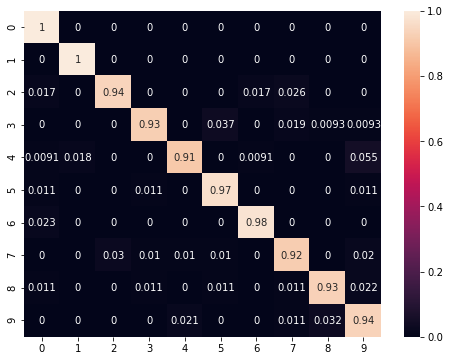

In [56]:
c_m_gs = confusion_matrix(y_test[:1000], y_pred_aug_gaus, normalize='true')
df_cm = pd.DataFrame(c_m_gs, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
fig = plt.figure(figsize = (8,6))
sn.heatmap(df_cm, annot=True)

In [57]:
fig.savefig('exp5_3.pdf')

In [7]:
def cross_val_score_aug_exp6(X, y, aug_type, aug_par_list):
    cv = kfold(X.shape[0], 3)
    model = KNNClassifier(k=4, strategy='brute', metric='euclidean',
                          weights=True, test_block_size=200)
    d = {}
    for aug_par in aug_par_list:
        rez = np.array([])
        for train, test in cv:
            model.cv = None
            model.fit(X[train], y[train])
            kn1 = model.find_kneighbors(X[test], True)
            if aug_type == 'a' :
                x2 = augment_rotate(X[test], aug_par)
                x3 = augment_rotate(X[test], -aug_par)
            elif aug_type == 'b':
                x2 = augment_shift(X[test], [0, aug_par])
                x3 = augment_shift(X[test], [aug_par, 0])
            else:
                x2 = augment_gauss(X[test], aug_par)
            kn2 = model.find_kneighbors(x2, True)
            if aug_type != 'c':
                kn3 = model.find_kneighbors(x3, True)
                kn = np.hstack([kn1[0], kn2[0], kn3[0]])
                el = np.hstack([kn1[1], kn2[1], kn3[1]])
            else:
                kn = np.hstack([kn1[0], kn2[0]])
                el = np.hstack([kn1[1], kn2[1]])
            idx = np.argsort(kn, axis=1)
            new_d = np.zeros((kn.shape[0], 4))
            new_el = np.zeros_like(new_d, dtype = int)
            for i in range(kn.shape[0]):
                new_d[i] = (kn[i][idx[i]])[:4]
                new_el[i] = (el[i][idx[i]])[:4]
            model.cv = new_d, new_el
            y_pred = model.predict(X[test])
            rez = np.append(rez, accuracy(y_pred, y[test]))
        d[aug_par] = rez
    return d

In [10]:
cross_val_score_aug_exp6(X_train[:6000], y_train[:6000], aug_type='a', aug_par_list=[5, 10, 15])

{5: array([0.9335, 0.9475, 0.942 ]),
 10: array([0.94  , 0.9495, 0.939 ]),
 15: array([0.9365, 0.953 , 0.945 ])}

In [11]:
cross_val_score_aug_exp6(X_train[:6000], y_train[:6000], aug_type='b', aug_par_list=[1, 2, 3])

{1: array([0.931 , 0.94  , 0.9425]),
 2: array([0.925 , 0.9295, 0.931 ]),
 3: array([0.92  , 0.9335, 0.929 ])}

In [12]:
cross_val_score_aug_exp6(X_train[:6000], y_train[:6000], aug_type='c', aug_par_list=[0.5, 1, 1.5])

{0.5: array([0.926 , 0.9365, 0.935 ]),
 1: array([0.918 , 0.924 , 0.9215]),
 1.5: array([0.859, 0.877, 0.886])}

In [13]:
model = KNNClassifier(k=4, strategy='brute', metric='cosine',
                      weights=True, test_block_size=500)

In [15]:
model.fit(X_train[:6000], y_train[:6000])
x1 = X_test[:1000]
kn1 = model.find_kneighbors(x1, True)
x2 = augment_rotate(x1, 15)
kn2 = model.find_kneighbors(x2, True)
x3 = augment_rotate(x1, -15)
kn3 = model.find_kneighbors(x3, True)
kn = np.hstack([kn1[0], kn2[0], kn3[0]])
el = np.hstack([kn1[1], kn2[1], kn3[1]])
idx = np.argsort(kn, axis=1)
new_d = np.zeros((kn.shape[0], 4))
new_el = np.zeros_like(new_d, dtype = int)
for i in range(kn.shape[0]):
    new_d[i] = (kn[i][idx[i]])[:4]
    new_el[i] = (el[i][idx[i]])[:4]
model.cv = new_d, new_el
y_pred_aug_rot = model.predict(X_test[:1000])

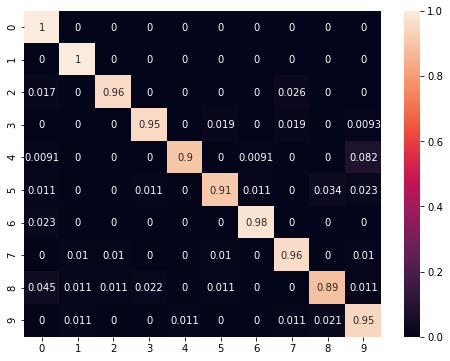

In [17]:
c_m_rot = confusion_matrix(y_test[:1000], y_pred_aug_rot, normalize='true')
df_cm = pd.DataFrame(c_m_rot, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
fig = plt.figure(figsize = (8,6))
sn.heatmap(df_cm, annot=True)

In [18]:
fig.savefig('exp6_1.pdf')

In [19]:
model.fit(X_train[:6000], y_train[:6000])
x1 = X_test[:1000]
kn1 = model.find_kneighbors(x1, True)
x2 = augment_shift(x1, [1, 0])
kn2 = model.find_kneighbors(x2, True)
x3 = augment_shift(x1, [0, 1])
kn3 = model.find_kneighbors(x3, True)
kn = np.hstack([kn1[0], kn2[0], kn3[0]])
el = np.hstack([kn1[1], kn2[1], kn3[1]])
idx = np.argsort(kn, axis=1)
new_d = np.zeros((kn.shape[0], 4))
new_el = np.zeros_like(new_d, dtype = int)
for i in range(kn.shape[0]):
    new_d[i] = (kn[i][idx[i]])[:4]
    new_el[i] = (el[i][idx[i]])[:4]
model.cv = new_d, new_el
y_pred_aug_shf = model.predict(X_test[:1000])

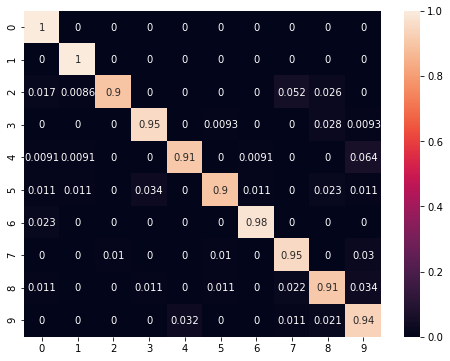

In [20]:
c_m_shf = confusion_matrix(y_test[:1000], y_pred_aug_shf, normalize='true')
df_cm = pd.DataFrame(c_m_shf, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
fig = plt.figure(figsize = (8,6))
sn.heatmap(df_cm, annot=True)

In [21]:
fig.savefig('exp6_2.pdf')

In [33]:
model.fit(X_train[:6000], y_train[:6000])
x1 = X_test[:1000]
kn1 = model.find_kneighbors(x1, True)
x2 = augment_gauss(x1, 0.5)
kn2 = model.find_kneighbors(x2, True)
kn = np.hstack([kn1[0], kn2[0]])
el = np.hstack([kn1[1], kn2[1]])
idx = np.argsort(kn, axis=1)
new_d = np.zeros((kn.shape[0], 4))
new_el = np.zeros_like(new_d, dtype = int)
for i in range(kn.shape[0]):
    new_d[i] = (kn[i][idx[i]])[:4]
    new_el[i] = (el[i][idx[i]])[:4]
model.cv = new_d, new_el
y_pred_aug_gaus = model.predict(X_test[:1000])

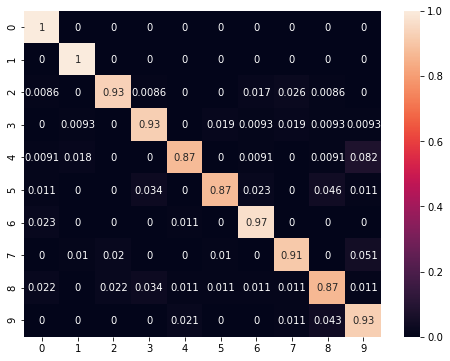

In [34]:
c_m_gaus = confusion_matrix(y_test[:1000], y_pred_aug_gaus, normalize='true')
df_cm = pd.DataFrame(c_m_gaus, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
fig = plt.figure(figsize = (8,6))
sn.heatmap(df_cm, annot=True)

In [35]:
fig.savefig('exp6_3.pdf')